<a href="https://colab.research.google.com/github/pranavkantgaur/ML-course/blob/main/ml_lec_x_random_forrest_tree_Melborune_wheather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Ensembling technique
* Bagging(Bootstrap aggregation)
  * Splitting dataset of size n with replacement into m subsets of size k where k <= n, where m is the number of homogenous base-learners
  * How to  aggregate the results? Voting, or averaging, ... think.
  * Merits:
    * Reduces variance, how? 
* Boosting: https://scikit-learn.org/stable/modules/ensemble.html#adaboost
  * Sequential model building based on data-reweighing (difficult data has higher weight than sinpler data)
  * Merits:
    * Reduces bias
* Stacking:
  * bagging with heterogenous base-learns + meta-classifier
  * Merits:
    * ??
* Cascading: 
  * Heterogenous boosting

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


# use for both decision and random forest



In [ ]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [ ]:
# Reading the csv file and putting it into 'df' object
df = pd.read_csv('/content/play.csv')
#df.head()
df

,Outlook,Temperature,Humidity,Windy,Play
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [ ]:
# Putting feature variable to X
X = df.drop('Play',axis=1)
# Putting response variable to y
y = df['Play']

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
feature_list = ['Outlook', 'Temperature', 'Humidity', 'Windy']
for feature in feature_list:
  feature_column = X[feature]
  le.fit(feature_column)
  print(le.classes_)
  X[feature] = le.transform(feature_column)

['Overcast' 'Rainy' 'Sunny']
['Cool' 'Hot' 'Mild']
['High' 'Normal']
[False  True]


In [ ]:
print(X)

    Outlook  Temperature  Humidity  Windy
0         1            1         0      0
1         1            1         0      1
2         0            1         0      0
3         2            2         0      0
4         2            0         1      0
5         2            0         1      1
6         0            0         1      1
7         1            2         0      0
8         1            0         1      0
9         2            2         1      0
10        1            2         1      1
11        0            2         0      1
12        0            1         1      0
13        2            2         0      1


In [ ]:
le.fit(y)
y = le.transform(y)
print(y)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [ ]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((9, 4), (5, 4))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(random_state=0, criterion="entropy")
#clf.fit(X_train, y_train)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

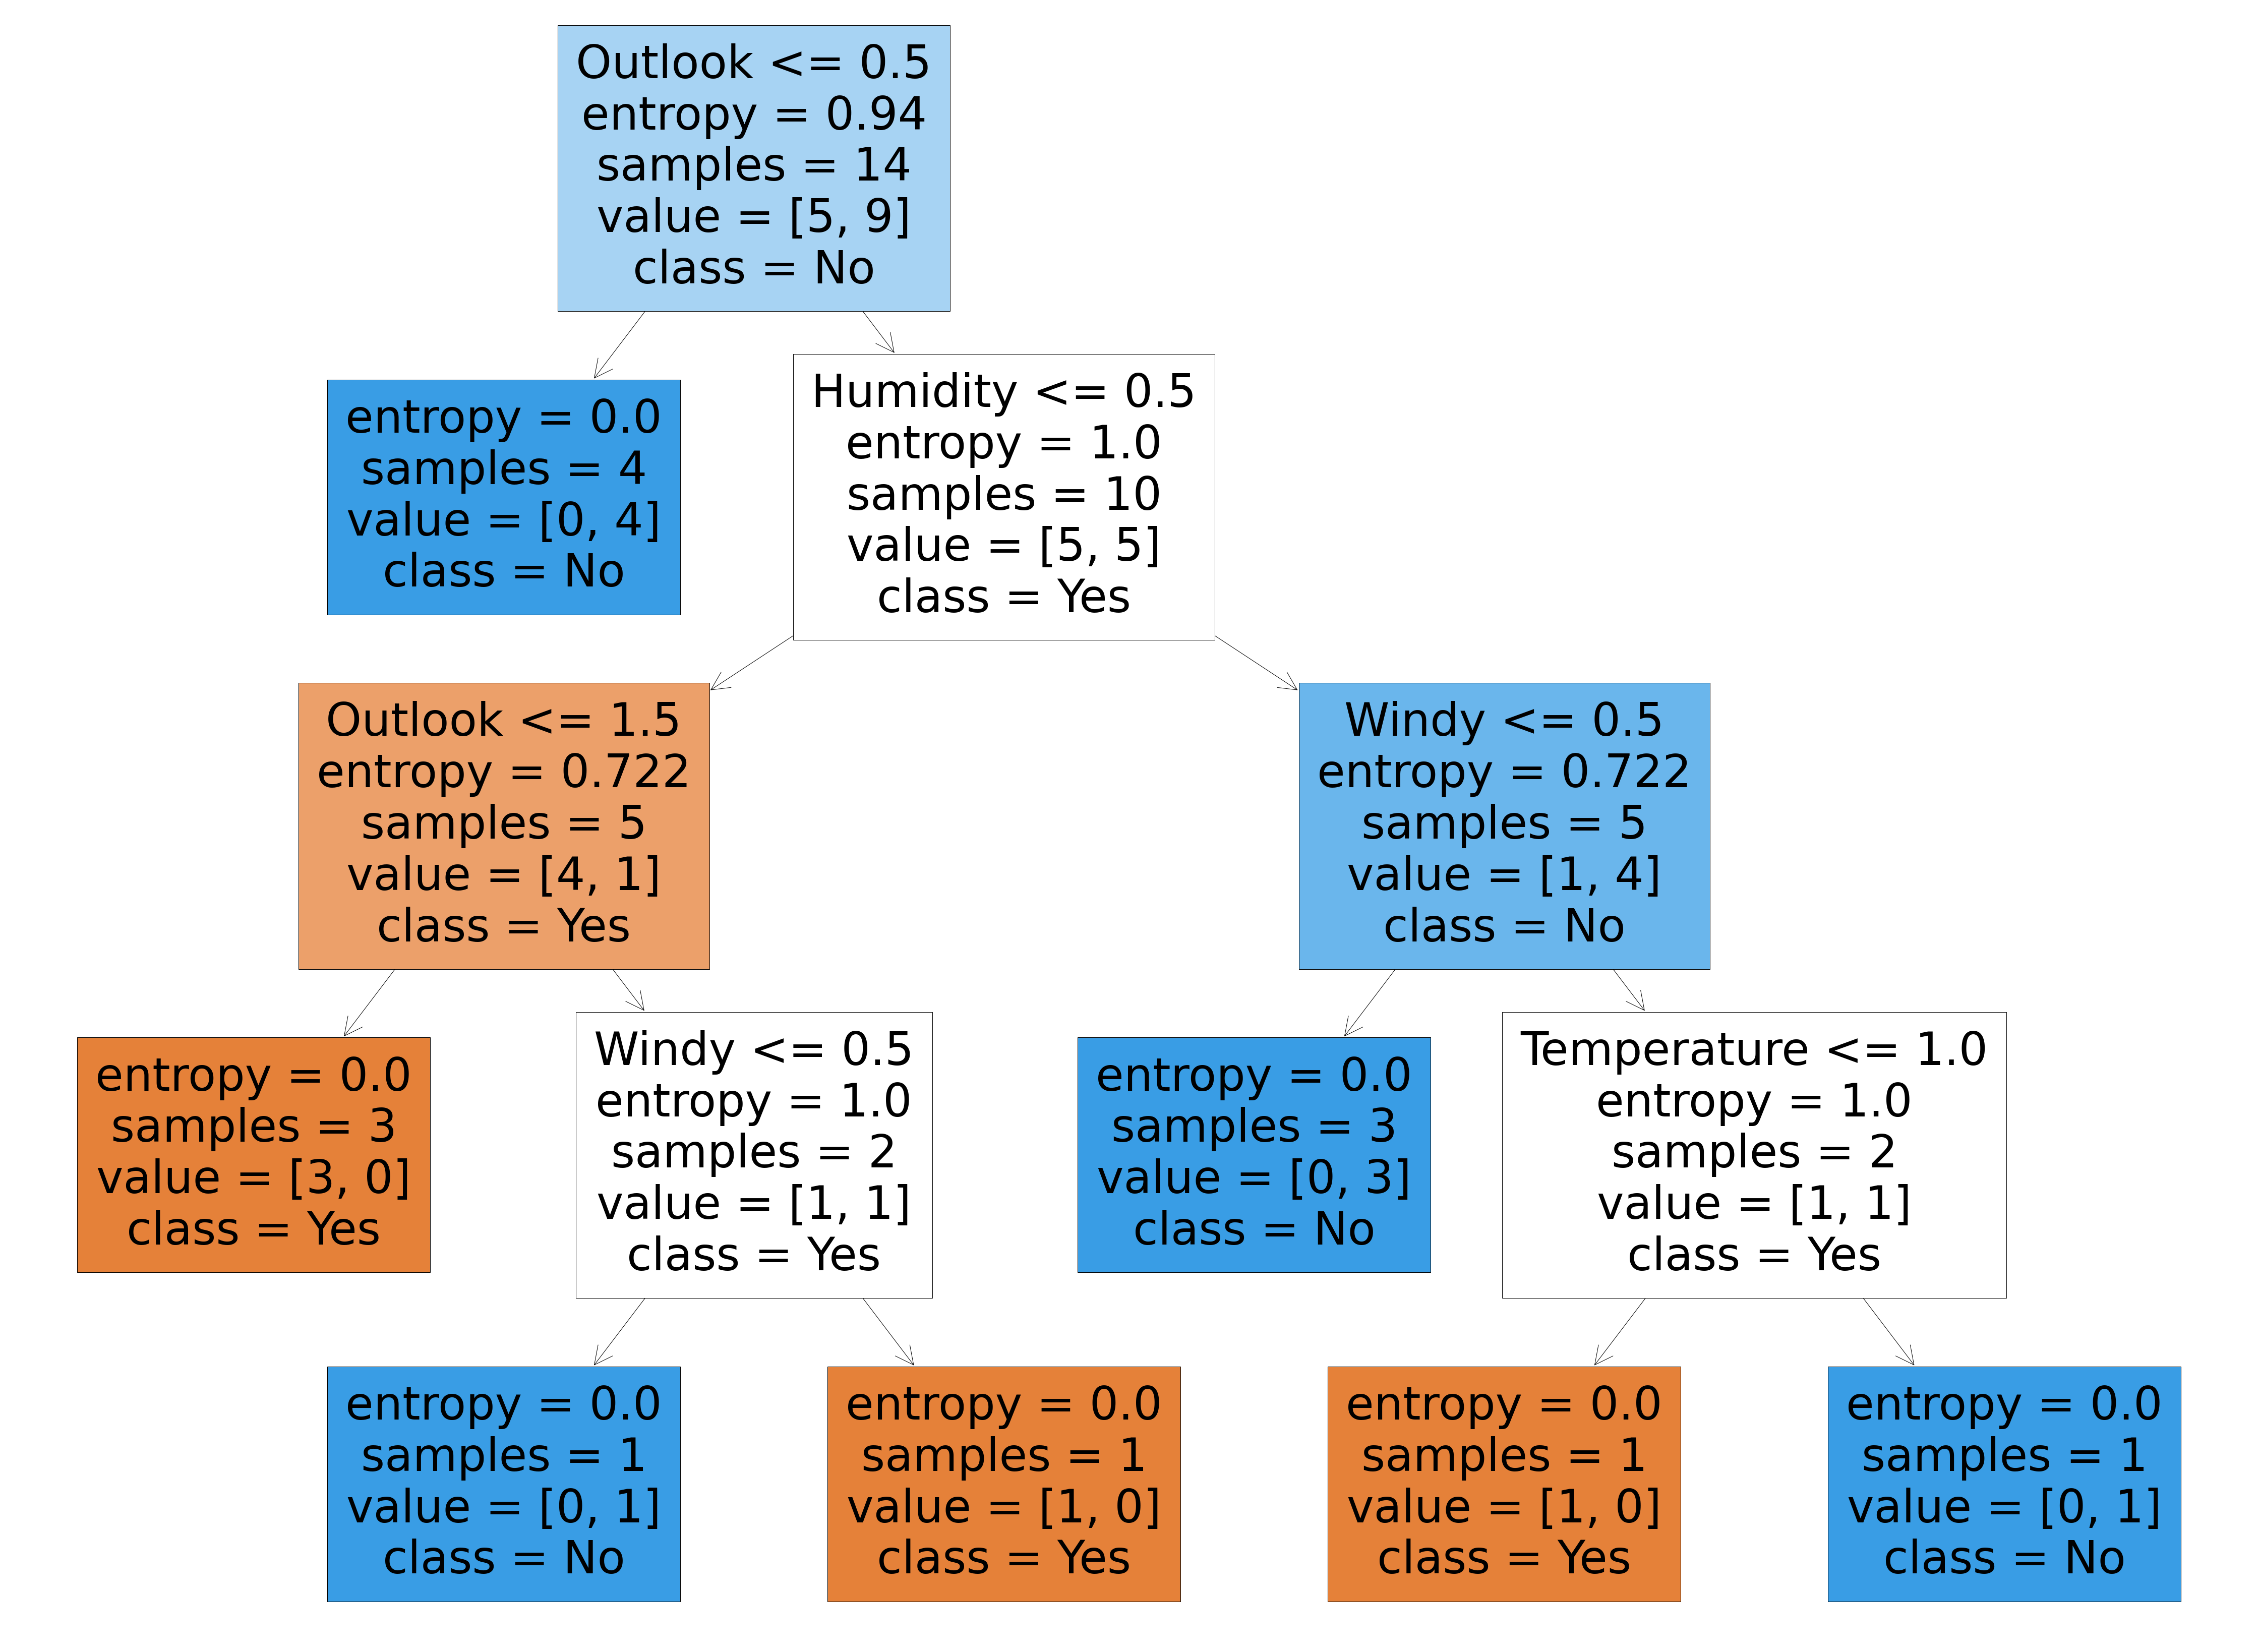

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (80, 60))
plot_tree(clf, feature_names = X.columns,class_names=['Yes', "No"],filled=True);

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [ ]:
#%%time
classifier_rf.fit(X_train, y_train)

CPU times: user 233 ms, sys: 29.4 ms, total: 262 ms
Wall time: 287 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
# checking the oob score
classifier_rf.oob_score_

0.2222222222222222

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

#%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.4583333333333333

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

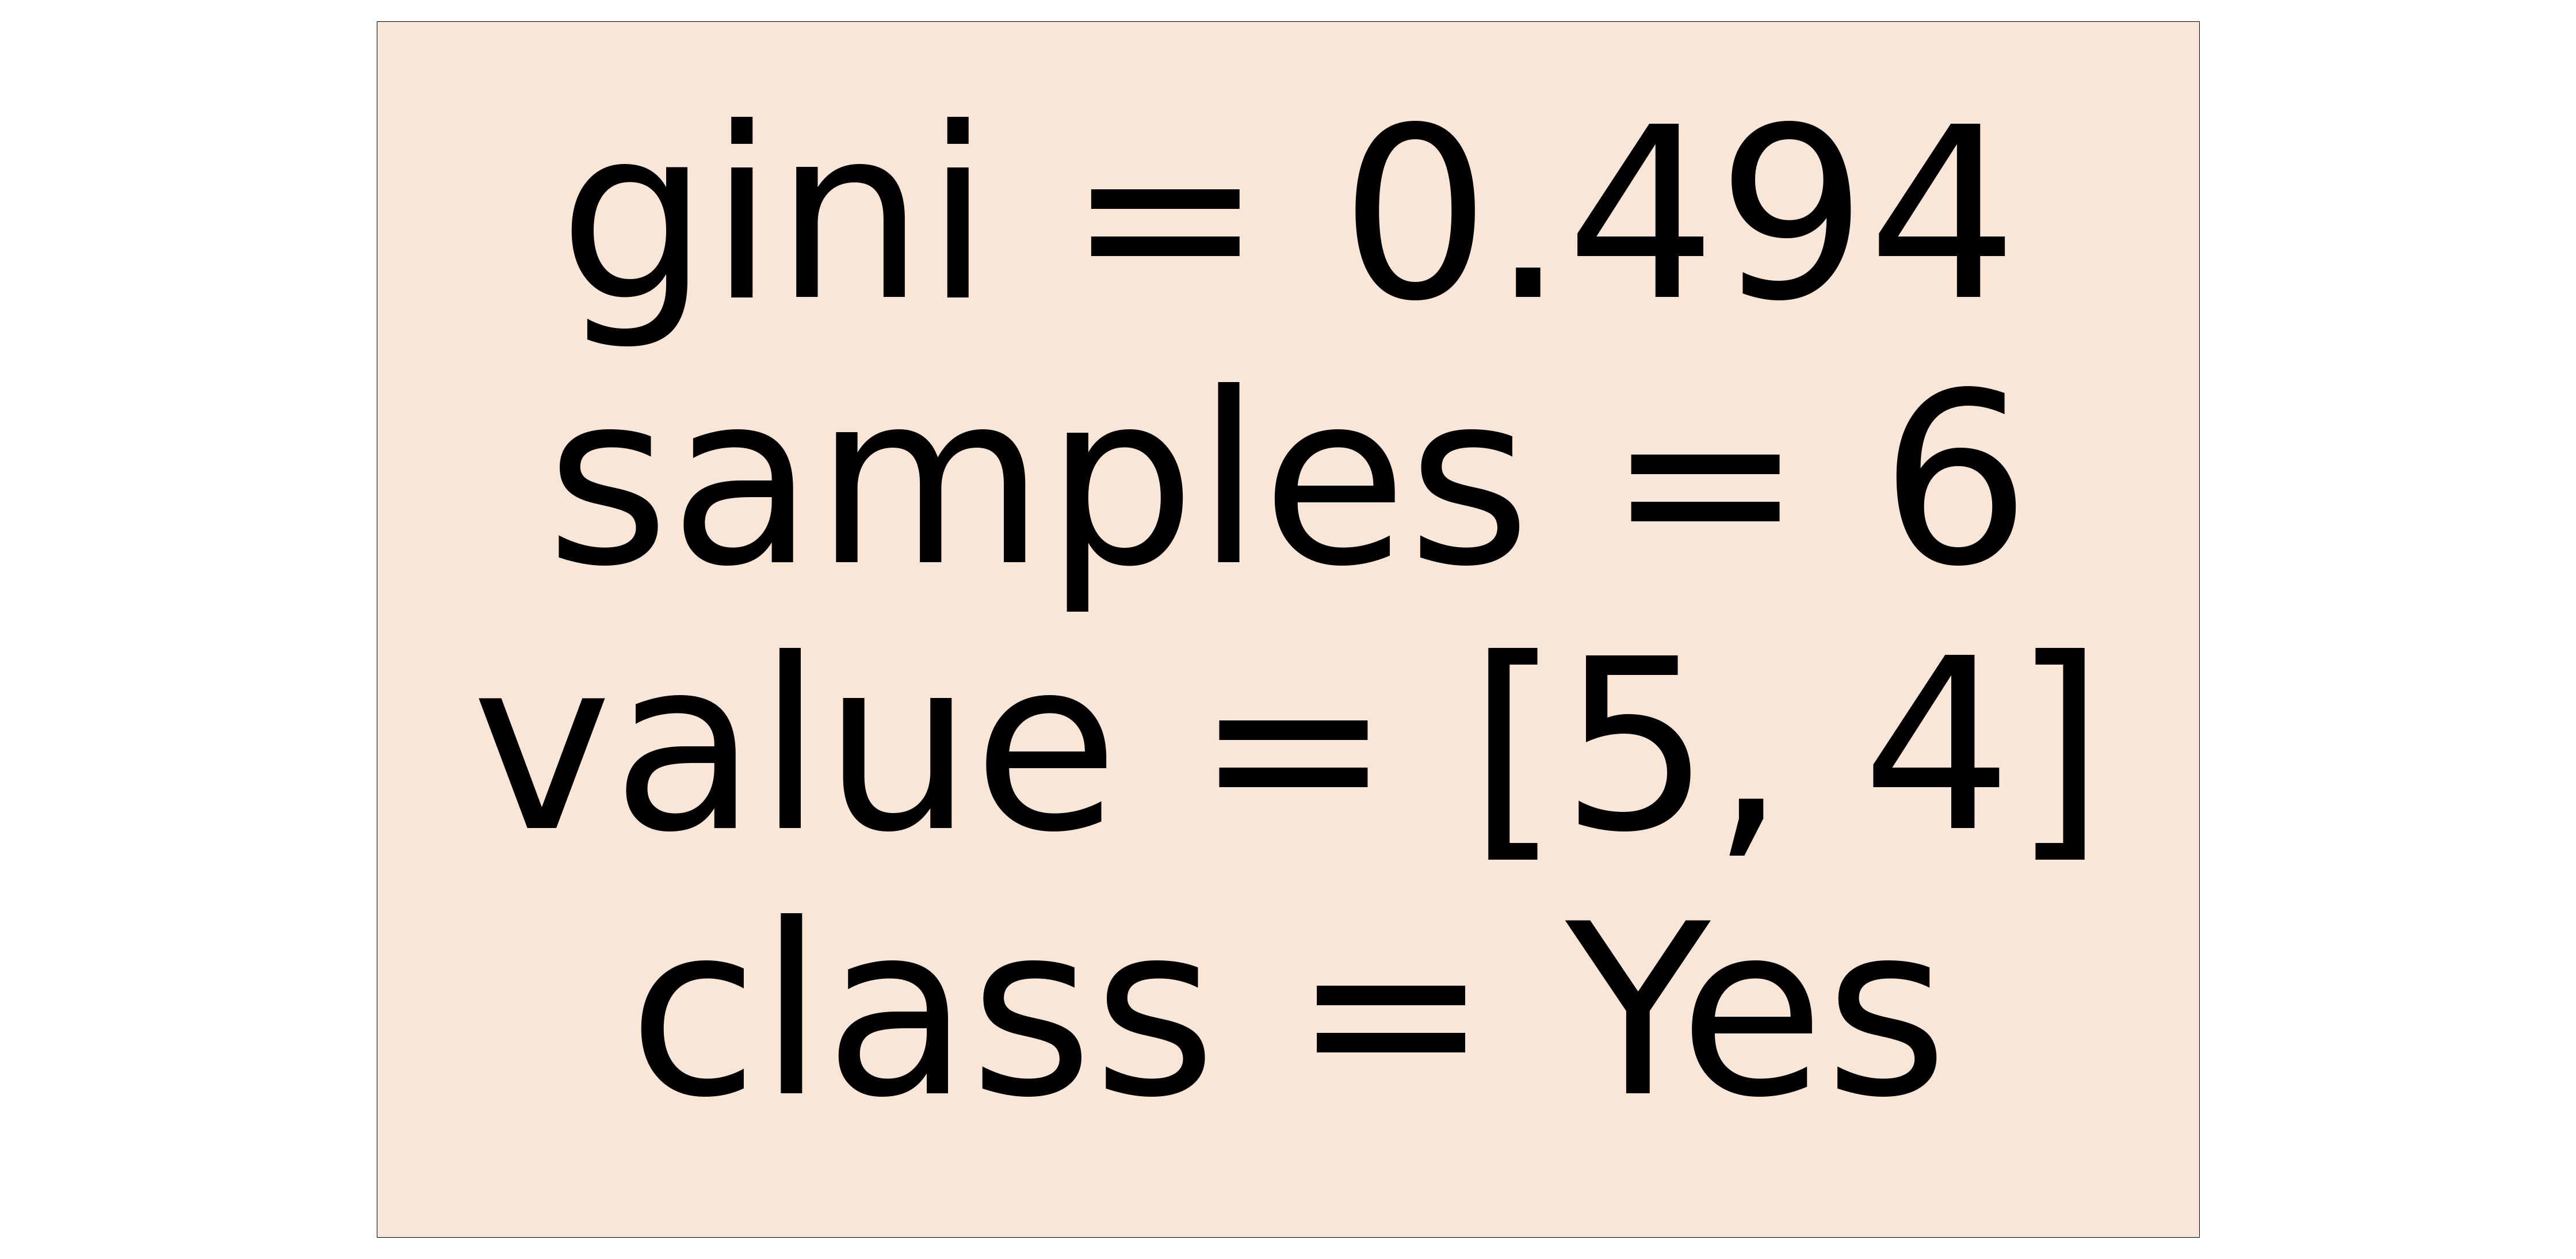

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Yes', "No"],filled=True);

### Bias vs Variance
High  Low combinations of bias and variance

Underfitting an overfitting phenomena

Decision tree-overffiting : Post and Pre prunning of decision trees

How Random forrest fixes overfitting

Bagging for overfitting

Boosting for under-fitting

